In [1]:
import torch
from torch import nn, Tensor
from utils import R2Loss

In [2]:
Batch = 16
Time = 136
Lat = 72
Lon = 144
data = torch.randn(Batch, Time, Lat, Lon)

# Create a time tensor with values [0, 1, 2, ..., Time-1]
time_tensor = torch.arange(Time, dtype=torch.float32)
print(time_tensor.shape, ' ', data.shape)
# Reshape the data tensor to (Batch, Time, -1), so each Lat-Lon grid point is a separate "feature"
data_reshaped = data.view(Batch, Time, -1)
# data_reshaped = data.permute(1,0,2,3)
print(data_reshaped.shape)
# Calculate the linear slopes for each sample in the batch
mean_time = time_tensor.mean()
time_diff = time_tensor - mean_time
print(time_diff.shape, time_diff.unsqueeze(0).shape)
numerator = (time_diff.unsqueeze(0).unsqueeze(2) * data_reshaped).sum(dim=1)
denominator = (time_diff**2).sum()
slopes = numerator / denominator

slopes = slopes.view(Batch, Lat, Lon)

torch.Size([136])   torch.Size([16, 136, 72, 144])
torch.Size([16, 136, 10368])
torch.Size([136]) torch.Size([1, 136])


In [12]:
slopes.shape

torch.Size([16, 72, 144])

[-0.03498343]
tensor(-0.0350)


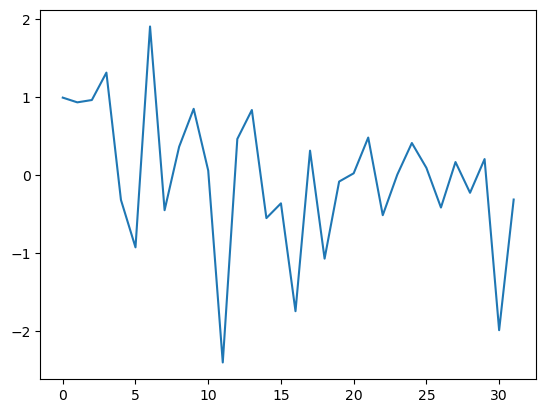

In [21]:
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
index1 = 10
index2 = 50
x = data[0, :, index1, index2].data.numpy()
model = LinearRegression().fit(np.arange(32).reshape(-1, 1), x)
print(model.coef_)
plt.plot(data[0, :, index1, index2].data.numpy())
print(slopes[0, index1, index2])

In [17]:
Batch = 16
Time = 136
Lat = 72
Lon = 144
Channel = 1
pred = torch.ones((Batch, Channel, Time, Lat, Lon))
target = torch.ones((Batch, Channel, Time, Lat, Lon))
target[:,:,0]+=1
B = target.shape[0]
mask = torch.ones_like(pred, device=pred.device)
pred = pred*mask
target = target*mask
mask_flatten = mask.view(B, -1)
target_flatten = target.view(B, -1)
pred_flatten = pred.view(B, -1)
# target_flatten_mean = torch.mean(target_flatten, dim=-1, keepdim=True)
target_flatten_mean = torch.sum(target_flatten, dim=-1, keepdim=True)
denom = torch.sum(mask_flatten, dim=-1, keepdim=True)
print(denom.shape, denom)
target_flatten_mean = target_flatten_mean/denom
print(target_flatten_mean.shape)
rss = torch.sum(torch.square(target_flatten-pred_flatten), dim=-1) # B, 1
tss = torch.sum(torch.square(target_flatten-target_flatten_mean), dim=-1) # B, 1
r2_loss = rss/tss
print(r2_loss.shape)
print(torch.mean(r2_loss))
print(torch.sum(r2_loss))

torch.Size([16, 1]) tensor([[1410048.],
        [1410048.],
        [1410048.],
        [1410048.],
        [1410048.],
        [1410048.],
        [1410048.],
        [1410048.],
        [1410048.],
        [1410048.],
        [1410048.],
        [1410048.],
        [1410048.],
        [1410048.],
        [1410048.],
        [1410048.]])
torch.Size([16, 1])
torch.Size([16])
tensor(1.0074)
tensor(16.1185)


In [18]:
pred = torch.ones((Batch, Channel, Time, Lat, Lon))
target = torch.ones((Batch, Channel, Time, Lat, Lon))
target[:,:,0]+=1
B = target.shape[0]
pred = pred
target = target
mask_flatten = mask.view(B, -1)
target_flatten = target.view(B, -1)
pred_flatten = pred.view(B, -1)
target_flatten_mean = torch.mean(target_flatten, dim=-1, keepdim=True)
print(target_flatten_mean.shape)
rss = torch.sum(torch.square(target_flatten-pred_flatten), dim=-1) # B, 1
tss = torch.sum(torch.square(target_flatten-target_flatten_mean), dim=-1) # B, 1
r2_loss = rss/tss
print(r2_loss.shape)
print(torch.mean(r2_loss))
print(torch.sum(r2_loss))

torch.Size([16, 1])
torch.Size([16])
tensor(1.0074)
tensor(16.1185)
